In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
customers = pd.read_csv('Mall_Customers.csv')

In [7]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# One-Hot Encoding gender column
customers_encoded = pd.get_dummies(customers)

In [10]:
customers_encoded.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


# Exploratory data analysis

<Axes: ylabel='Age'>

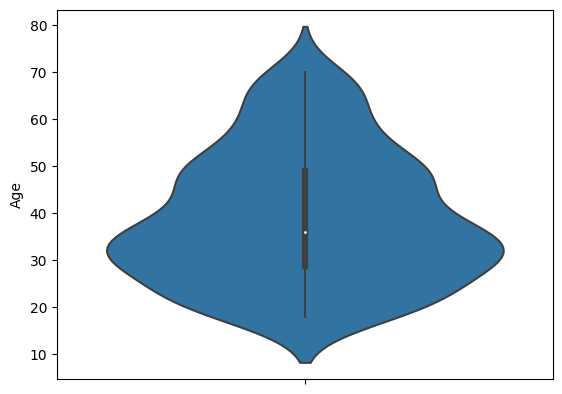

In [16]:
sns.violinplot(y='Age', data=customers_encoded)

<Axes: ylabel='Spending Score (1-100)'>

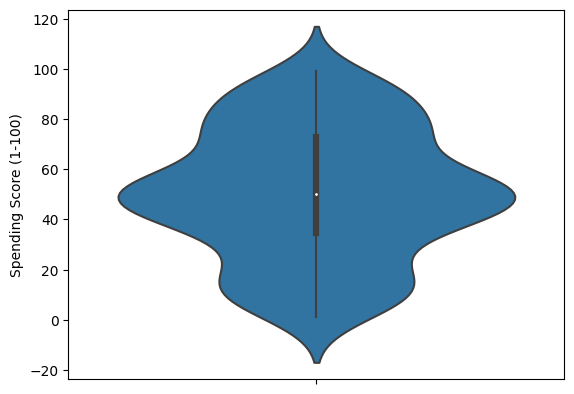

In [17]:
sns.violinplot(y='Spending Score (1-100)', data=customers_encoded)

<Axes: ylabel='Annual Income (k$)'>

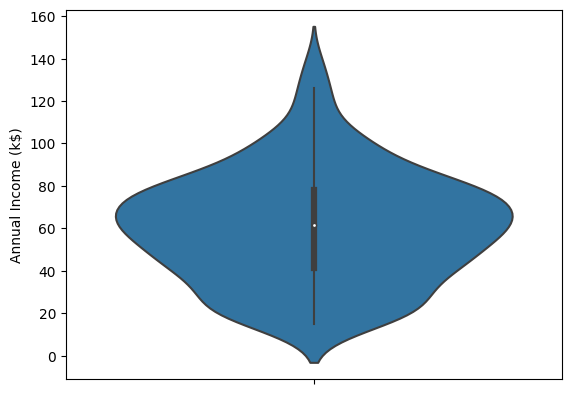

In [18]:
sns.violinplot(y='Annual Income (k$)', data=customers_encoded)

##### Columns dont have outliers are and are close to normal distribution. Therefore, no furthure processing is required

<Axes: xlabel='count', ylabel='Gender'>

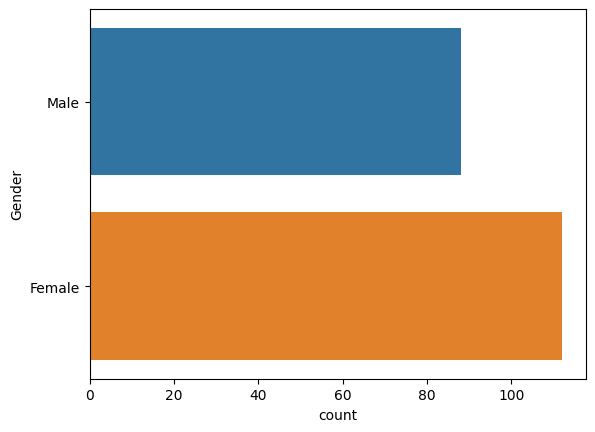

In [19]:
sns.countplot(y='Gender', data=customers)

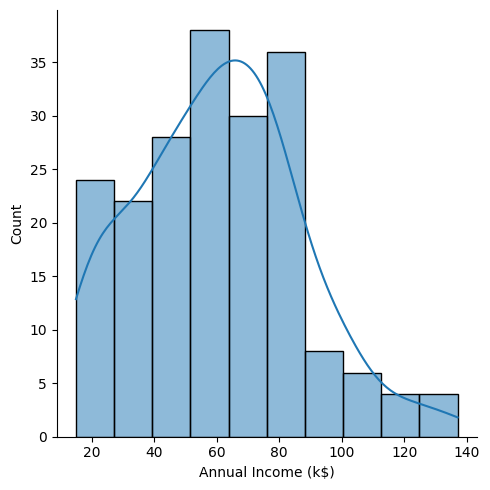

In [20]:
sns.displot(customers_encoded['Annual Income (k$)'], kde=True)

# Applying K-means clustering for Annual income and spending score

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

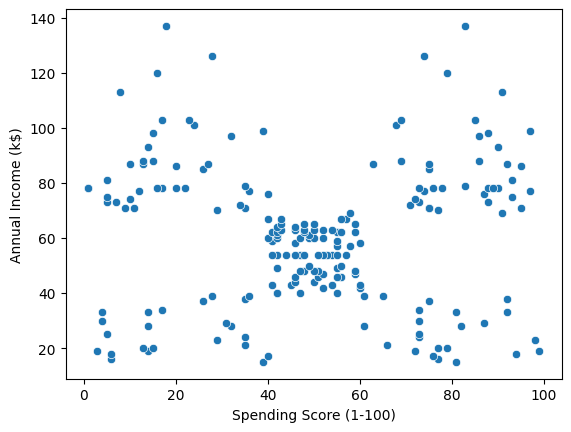

In [21]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=customers_encoded)

In [22]:
# Create an elbow plot to find the best number of cluster
X = customers_encoded[['Spending Score (1-100)', 'Annual Income (k$)']].to_numpy()
wcse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X)
    wcse.append(kmeans.inertia_)

<Axes: >

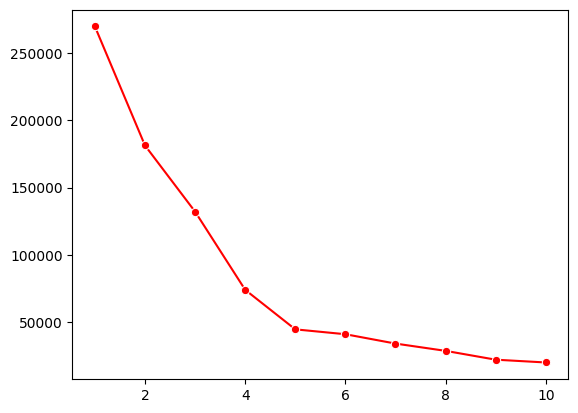

In [23]:
sns.lineplot(x=range(1, 11), y=wcse, marker='o', color='red')

In [24]:
# Creating the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [25]:
y = kmeans.predict(X)

[]

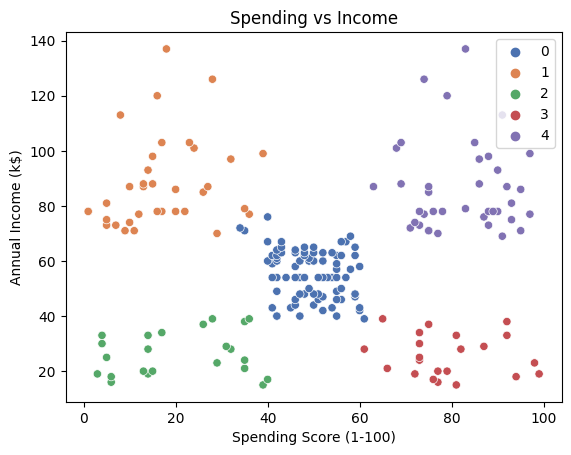

In [26]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=customers_encoded, hue=y, palette='deep')
plt.legend(loc='upper right')
plt.title('Spending vs Income')
plt.plot()

In [27]:
customers['clusterLabel'] = y

In [28]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusterLabel
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
